Відрізок 1:
S_0(x) = 2.45 + -4.4159(x - 0.4) + 0.0(x - 0.4)^2 + 7.8985(x - 0.4)^3 x належить [0.4, 0.6]
Відрізок 2:
S_1(x) = 1.63 + -3.4681(x - 0.6) + 4.7391(x - 0.6)^2 + -2.4474(x - 0.6)^3 x належить [0.6, 0.9]
Відрізок 3:
S_2(x) = 0.95 + -1.2855(x - 0.9) + 2.5364(x - 0.9)^2 + -1.6909(x - 0.9)^3 x належить [0.9, 1.4]
Відрізок 4:
S_3(x) = 0.73 + 2.0333(x - 1.4) + 0.0(x - 1.4)^2 + 0.0(x - 1.4)^3 x належить [1.4, 2.0]


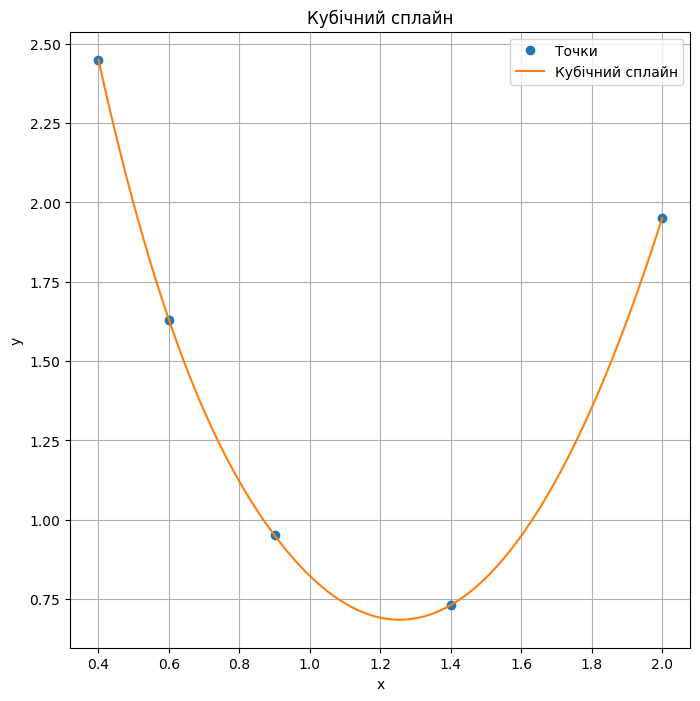

In [1]:
# Варіант 7

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.4, 0.6, 0.9, 1.4, 2])
y = np.array([2.45, 1.63, 0.95, 0.73, 1.95])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = 0
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3 x належить [{x[i]}, {x[i+1]}]")
       
# Побудова кубічного сплайна
cs = CubicSpline(x, y)
       
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
       
# Значення сплайна
# print("Значення сплайна:")
# for i in range(len(x_new)):
#     print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
       
# Будуємо графік
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()